In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')        # 이 설정을 하지 않으면 한글 깨짐...
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'brokenLineExam'   # 차트 제목
filename = './../data/주요발생국가주간동향(4월2째주).csv'    # dataFrame 에 대한 데이터

In [2]:
data = pd.read_csv(filename, index_col = '국가', encoding = 'cp949')  # encoding : 한글이 깨지지않게
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [3]:
chartdata = data['4월06일']
chartdata
# type(chartdata)

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

brokenLineExam_01.png


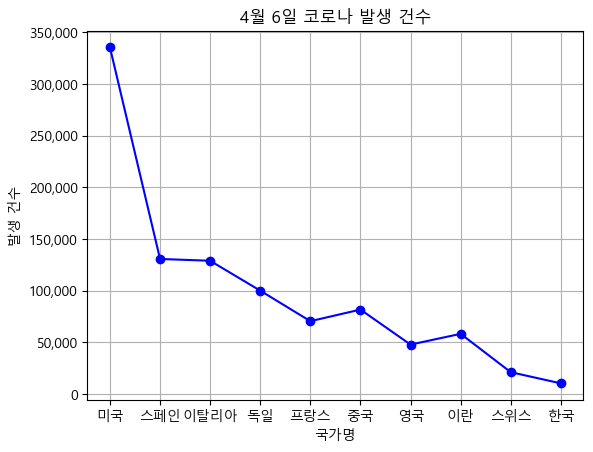

In [4]:
plt.plot(chartdata, color = 'blue', linestyle = 'solid', marker = 'o')
YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL

values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.grid(True)
plt.xlabel('국가명')
plt.ylabel('발생 건수')
plt.title('4월 6일 코로나 발생 건수')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + '.png'
plt.savefig(savefile, dpi = 400)
print(savefile)

In [5]:
COUNTRY = ['스페인', '프랑스' ,'독일', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
chartdata = data.loc[COUNTRY, WHEN]

chartdata = chartdata.T     # .T 행렬 바뀜
chartdata

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


brokenLineExam_02.png파일이 저장되었습니다.


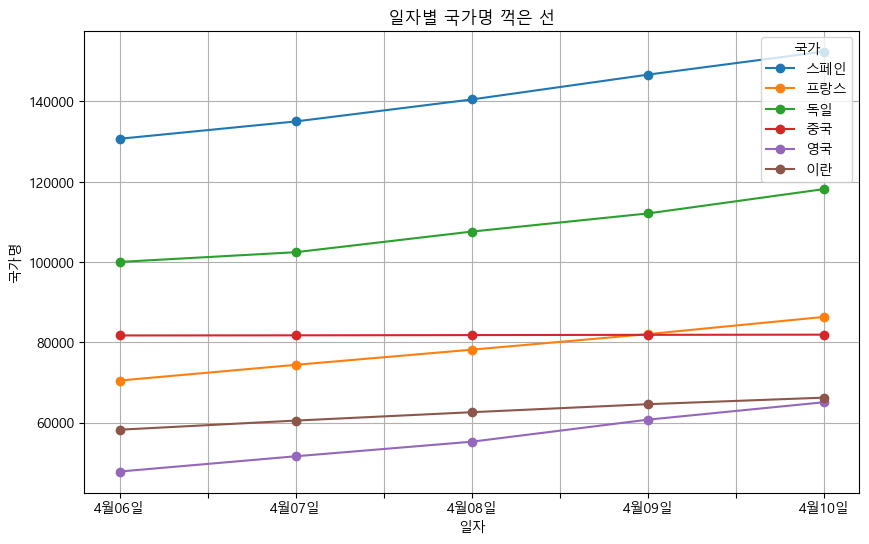

In [6]:
chartdata.plot(title = 'SomeTitle', figsize = (10, 6), legend = True, marker = 'o', rot = 0)

plt.grid(True)
plt.xlabel('일자')
plt.ylabel('국가명')
plt.title('일자별 국가명 꺽은 선')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')


In [7]:
tipsfile = './../data/tips.csv'

myframe = pd.read_csv(tipsfile)
myframe = myframe.head(100)

myframe

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,98,21.01,3.00,Male,Yes,Fri,Dinner,2


In [8]:
myframe.describe()

,Unnamed: 0,total_bill,tip,size
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,19.616700,3.059000,2.520000
std,29.011492,7.917297,1.287689,0.822413
min,0.000000,3.070000,1.000000,1.000000
25%,24.750000,14.817500,2.007500,2.000000
50%,49.500000,18.160000,3.000000,2.000000
75%,74.250000,22.990000,3.602500,3.000000
max,99.000000,48.270000,7.580000,4.000000


In [9]:
len(myframe)

100

In [10]:
xrange = range(len(myframe))
data_bill = myframe.loc[:, ['total_bill']]
data_tip = myframe.loc[:, ['tip']]

brokenLineExam_03.png파일이 저장되었습니다.


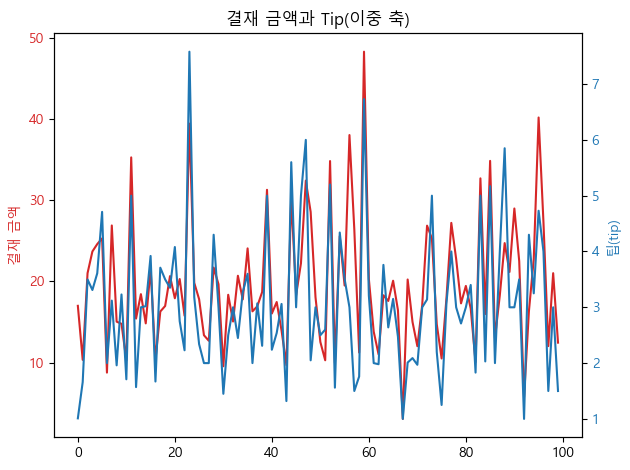

In [11]:
fig, ax1 = plt.subplots()

ax1.set_title('결재 금액과 Tip(이중 축)')

color = 'tab:red'

ax1.set_ylabel('결재 금액', color = color)
ax1.plot(xrange, data_bill, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('팁(tip)', color = color)
ax2.plot(xrange, data_tip, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()

cnt = cnt + 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')